## 6. Cooking the final model still

In [1]:
# Import modules
import os
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [2]:
# Import keras layres modules
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, SpatialDropout2D, Flatten, Dense, Activation, AveragePooling2D

In [3]:
# Define paths to data
train_dir = 'data/10_food_classes/train/'
test_dir = 'data/10_food_classes/test/'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Create augmented and not augmented train datasets

# Create data generators
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   height_shift_range=.3,
                                   horizontal_flip=True
                                  )

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Create batch flow from directories
train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            batch_size=32)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Our prievious models did not perform well: (a) overfitting (b) low accuracy scores. 

### Create a model that:
1. Has SpatialDropout2D(.25) *(previous models performed better on validation data, so we can turn regularization a bit down)*
2. Has Dense layers architecture inspired by LeNet-5 *(this direction enhanced model performance before)
3. The last Conv2D layer has 60 filters.

In [8]:
lenet_5_model = Sequential([
    Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(224, 224, 3), padding='same'), #C1
    AveragePooling2D(), #S2
    Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    AveragePooling2D(), #S4
    Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    Flatten(), #Flatten    
    Dense(84, activation='tanh'), #F6
    Dense(10, activation='softmax') #Output layer
])

In [9]:
lenet_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 6)       456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 108, 108, 16)      2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 120)       48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 300000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [11]:
# We set learning rate:
lr = 0.0005

In [28]:
# Create a model like LeNet-5 implementation: https://medium.com/analytics-vidhya/dense-or-convolutional-part-1-c75c59c5b4ad
model_11 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.25),
    MaxPool2D(),
    Conv2D(10,3),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(60, 3),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [29]:
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_14 (Activation)   (None, 222, 222, 10)      0         
_________________________________________________________________
spatial_dropout2d_7 (Spatial (None, 222, 222, 10)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
activation_15 (Activation)   (None, 109, 109, 10)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 10)       

In [30]:
# Train the model
history_11 = model_11.fit(train_data_aug, 
                          epochs=10, 
                          steps_per_epoch=len(train_data_aug), 
                         validation_data=test_data, 
                         validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 247s 1s/step - loss: 2.3086 - accuracy: 0.1287 - val_loss: 2.1863 - val_accuracy: 0.2108
Epoch 2/10
235/235 [==============================] - 246s 1s/step - loss: 2.2157 - accuracy: 0.1717 - val_loss: 2.1269 - val_accuracy: 0.2252
Epoch 3/10
235/235 [==============================] - 166s 708ms/step - loss: 2.1660 - accuracy: 0.2063 - val_loss: 2.0682 - val_accuracy: 0.2768
Epoch 4/10
235/235 [==============================] - 205s 873ms/step - loss: 2.1176 - accuracy: 0.2372 - val_loss: 1.9703 - val_accuracy: 0.3280
Epoch 5/10
235/235 [==============================] - 174s 742ms/step - loss: 2.0765 - accuracy: 0.2565 - val_loss: 1.9703 - val_accuracy: 0.3044
Epoch 6/10
235/235 [==============================] - 194s 826ms/step - loss: 2.0345 - accuracy: 0.2707 - val_loss: 1.9314 - val_accuracy: 0.3168
Epoch 7/10
235/235 [==============================] - 203s 863ms/step - loss: 1.9983 - accuracy: 0.2876 - val_loss: 1.8729 - val_a

In [31]:
# Plot validation and training curves separately
def plot_the_curves(history):
    '''
    Returns separate loss curves for training and validation data
    '''
    # Obtain loss from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Obtain accuracy from history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Obtain number of epochs
    epochs = range(len(history.history['loss']))
    
    # Setup the figure
    plt.figure(figsize=(24, 6))
    plt.suptitle(f'Model {history.model.name} metrics', fontsize='x-large')
    
    # Plot loss
    plt.subplot(1, 2, 1)
    ax1 = plt.plot(epochs, loss, label='Training Loss')
    ax1 = plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss Curves')
                  
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Curves')

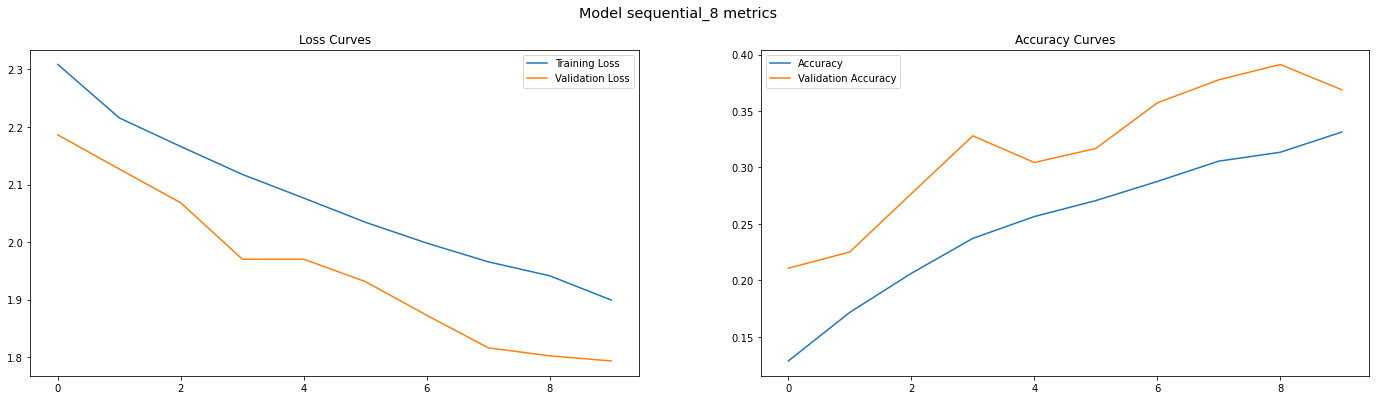

In [32]:
plot_the_curves(history_11)

In [33]:
# Create a new model that will be trained for longer 
model_11_1= tf.keras.models.clone_model(model_11)

In [34]:
# Compile the model
model_11_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [35]:
# Fit the model
history_11_1 = model_11_1.fit(train_data_aug, 
                              epochs=20, 
                              steps_per_epoch=len(train_data_aug), 
                              validation_data=test_data, 
                              validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 191s 815ms/step - loss: 2.2608 - accuracy: 0.1451 - val_loss: 2.1446 - val_accuracy: 0.2064
Epoch 2/20
235/235 [==============================] - 194s 827ms/step - loss: 2.1757 - accuracy: 0.2043 - val_loss: 2.0018 - val_accuracy: 0.3104
Epoch 3/20
235/235 [==============================] - 222s 943ms/step - loss: 2.0964 - accuracy: 0.2413 - val_loss: 1.9620 - val_accuracy: 0.3088
Epoch 4/20
235/235 [==============================] - 207s 881ms/step - loss: 2.0314 - accuracy: 0.2797 - val_loss: 1.8825 - val_accuracy: 0.3416
Epoch 5/20
235/235 [==============================] - 175s 746ms/step - loss: 1.9885 - accuracy: 0.2976 - val_loss: 1.8465 - val_accuracy: 0.3608
Epoch 6/20
235/235 [==============================] - 173s 736ms/step - loss: 1.9681 - accuracy: 0.3093 - val_loss: 1.8222 - val_accuracy: 0.3640
Epoch 7/20
235/235 [==============================] - 194s 826ms/step - loss: 1.9189 - accuracy: 0.3255 - val_loss: 1.8689 -

Still unsatifactory. Let's check how bare LeNet-5 performs on the data

In [12]:
lenet_5_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                     metrics=['accuracy'])

In [ ]:
history_lenet_5 = lenet_5_model.fit(train_data_aug, 
                                    epochs=20, 
                                    steps_per_epoch=len(train_data_aug), 
                                    validation_data=test_data, 
                                    validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 520s 2s/step - loss: 2.4235 - accuracy: 0.1063 - val_loss: 2.3094 - val_accuracy: 0.1000
Epoch 2/20
235/235 [==============================] - 454s 2s/step - loss: 2.3078 - accuracy: 0.0983 - val_loss: 2.3144 - val_accuracy: 0.1000
Epoch 3/20
235/235 [==============================] - 484s 2s/step - loss: 2.3088 - accuracy: 0.0919 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 4/20
143/235 [=================>............] - ETA: 2:43 - loss: 2.3080 - accuracy: 0.0975